In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("house_rental_data.csv.txt")
df

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...,...
640,644,1359.156,7,15,3,2,2,45000
641,645,377.148,4,10,1,1,1,24800
642,646,740.064,13,14,1,1,1,45000
643,647,1707.840,3,14,3,2,2,65000


In [12]:
df.drop(["Unnamed: 0"], axis =1)


KeyError: "['Unnamed: 0'] not found in axis"

In [11]:
df

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
640,1359.156,7,15,3,2,2,45000
641,377.148,4,10,1,1,1,24800
642,740.064,13,14,1,1,1,45000
643,1707.840,3,14,3,2,2,65000


C:\Users\Sindhiya\AppData\Local\Temp\ipykernel_12056\4271458538.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Price"])


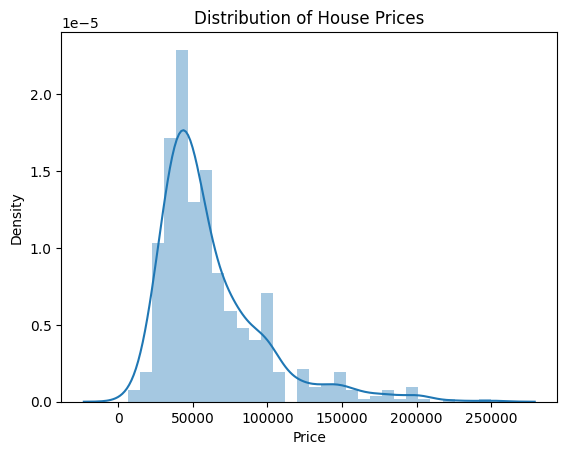

In [27]:
sns.distplot(df["Price"])
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.show()

In [13]:
X = df.iloc[:,:-1].values
y= df.iloc[:,6].values

In [14]:
print('X matrix dimensionality:', X.shape)
print('y matrix dimensionality:', y.shape)

X matrix dimensionality: (645, 6)
y matrix dimensionality: (645,)


In [15]:
#splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 7)

In [34]:
#searching for optimal value of K

rmse_val = []

k_range = (1,10)

for k in k_range:
    model = KNeighborsRegressor(n_neighbors =k)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    error = np.sqrt(mean_squared_error(y_test, pred))
    rmse_val.append(error)
rmse_val

[19179.02001986756,
 15891.789547843431,
 16601.493287856236,
 16583.808060859203,
 16724.52487562349,
 17103.416872334943,
 17576.653718013426,
 17429.539825427488,
 17482.151206418966]

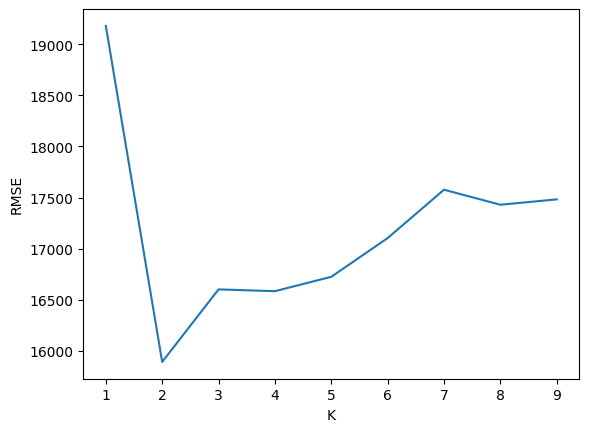

In [38]:
#finding the optimal vale of k

k_range = range(1,10)
plt.plot(k_range, rmse_val)
plt.xlabel('K')
plt.ylabel('RMSE')
plt.show()





In [41]:
model = KNeighborsRegressor(n_neighbors = 5)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("Predicted House Price",pred)

Predicted House Price [ 45100.   50800.  183800.   42299.6  45000.   53800.   93500.   38800.
  82000.   38900.   51100.   45520.   38160.   79199.8  84140.   46799.8
  53000.   36400.   45100.  126000.   26877.6  35600.   51599.8  33559.8
  65000.   43359.8  43960.   84140.   66399.8  50800.   28400.  109599.8
 182000.  109599.8  85600.   36400.   42299.6  38900.   53024.   38800.
  53400.   42200.   26877.6  58400.   40200.   37000.   25999.8  49360.
  58777.6  54159.8  80200.   44600.  119999.8  40200.   79600.   33800.
  50800.   73000.   77999.6  47320.   53800.   86600.   28206.4  32960.
  37000.   41955.2  67000.   42160.   80999.6  60000.   65000.   67800.
  68520.   36305.6  33800.   60624.   29206.4  74599.8  33100.   73000.
  73977.6 141599.8 131200.   51000.   49940.   72399.8  89000.   39955.4
  52920.   52600.   80200.   62700.   83200.   23006.4  31499.8  80599.8
  60000.   81600.   58777.6  37000.   83780.   44560.   30740.   57377.6
  26059.8  68000.   33806.4  85600. 

In [42]:
error = np.sqrt(mean_squared_error(y_test, pred))
print('RMSE : ', error)

RMSE :  16724.52487562349
